# Average temperatures in all rooms for one user
Example userids: 53, 1200

Computing plot


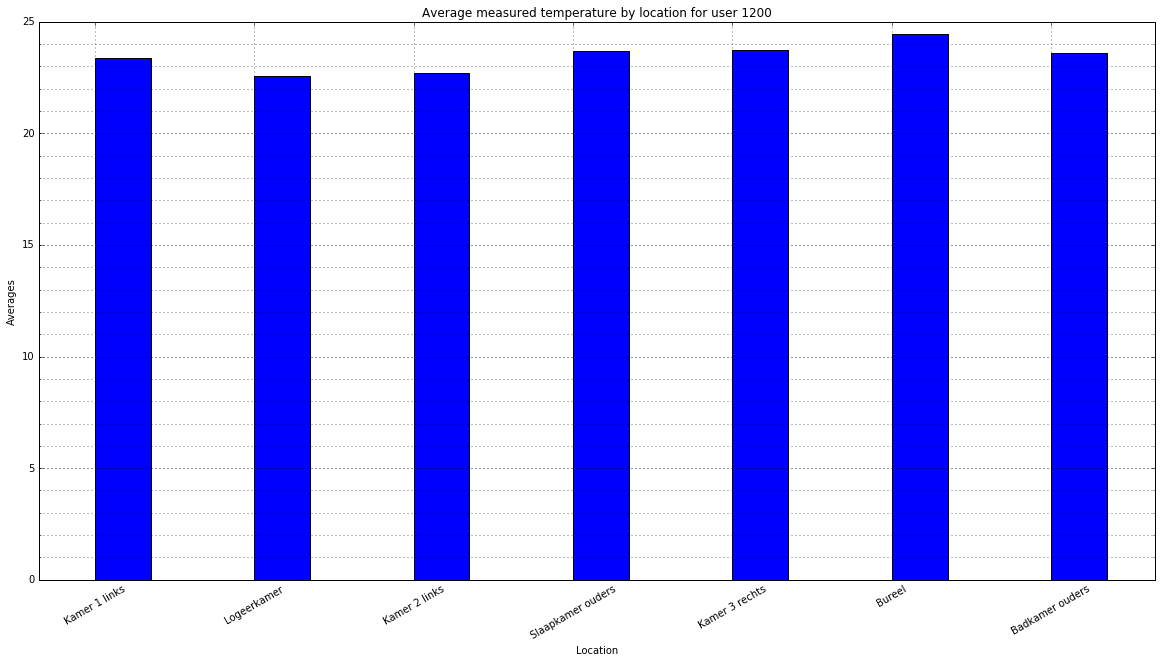

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np

from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

user_box = widgets.Text("userid")
display(user_box)

userId = 0

def handle_user_submit(sender):
    global userId
    userId = user_box.value
    clear_output()
    print "Computing plot"
    compute_plot()

user_box.on_submit(handle_user_submit)
    
def compute_plot():
    df = sqlContext.sql(
        "select locationName as name, AVG(value) as average "
        + "from measuredTemps "
        + "where userid = '" + str(userId) + "' "
        + "group by locationname")

    collected = df.collect()

    locations = []
    averages = []

    for element in collected:
        locations.append(element.name)
        averages.append(element.average)
    
    ind = range(len(collected))
    width = 0.35

    fig, ax = plt.subplots(figsize=(20,10))

    plt.bar(ind, averages, width)

    plt.ylabel('Averages')
    plt.xlabel('Location')
    plt.title('Average measured temperature by location for user ' + str(userId))
    plt.xticks(ind, locations, rotation=30)
    plt.grid(which='major')
    plt.grid(which='minor')

    ax.yaxis.set_minor_locator(mticker.MultipleLocator())

    # Set a buffer around the edge
    plt.xlim([min(ind)-width, max(ind)-width])

    plt.show()